
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

## PROYECTO 7

Introducción.

El proyecto que se desarrolla a continuación cuenta con información referente a una empresa de taxis contenida en 3 dataframes.

DF1: contiene nombre de la empresa de taxis, así como el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

DF2: contiene barrios de Chicago donde finalizaron los viajes así como el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

DF3: contiene la fecha y hora de la recogida, las condiciones climáticas en el momento en el que comenzó el viaje y la duración del viaje en segundos

Los objetivos, además de la correcta importación de librerias y de los archivos csv, son 3:

1.- Observar las compañias que mas viajes tieen entre el 15 y 16 de noviembre de 2017

2.- Conocer cuales son los principales destinos en la ciudad de Chicago en el mes de noviembre de 2017

3.- Conocer si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. 

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Alejandro, cuando hacemos análisis de datos es muy útil escribir una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Hola Tonatiuh, buenos dias, hice los cambios solicitados y al cambiar el valor de la prueba ttest cambié tambien la conclusión, muchas gracias

### Preparación

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as nd
import math as mt
from scipy import stats

In [2]:
df1 = pd.read_csv("/datasets/project_sql_result_01.csv")
df2 = pd.read_csv("/datasets/project_sql_result_04.csv")
df3 = pd.read_csv("/datasets/project_sql_result_07.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

### Análisis Exploratorio de Datos


#### Revisión de datos y tipos de datos 

Se puede observar que los datos corresponden con la descripción dada en las instrucciones, de igual manera no encontramos valores nulos ni filas duplicadas en ninguno de los dataframe. unicamente se hizo una modificación en el df3 para cambiar la columna start_ts a datetime para facilitar su manipulación posterior. 


In [3]:
print(df1.head())
print()
print(df1.info())
print()
print(df1.isnull().sum())
print()
print(df1.duplicated().sum())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

company_name    0
trips_amount    0
dtype: int64

0


In [4]:
print(df2.head())
print()
print(df2.info())
print()
print(df2.isnull().sum())
print()
print(df2.duplicated().sum())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

dropoff_location_name    0
average_trips            0
dtype: int64

0


In [5]:
print(df3.head())
df3['start_ts'] = pd.to_datetime(df3['start_ts'], format='%Y-%m-%d %H:%M:%S')
print()
print(df3.info())
print()
print(df3.isnull().sum())
print()
print(df1.duplicated().sum())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

0


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis de registros duplicados!.</div>

####  ¿Cuáles son los 10 principales barrios en términos de finalización del recorrido?

In [6]:
top10_dropoff= df2.sort_values(by='average_trips',ascending=False).head(10)

print(top10_dropoff)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


#### Gráficos sobre las empresas de taxis (1) y como sobre los 10 barrios principales por número de finalizaciones(2).

1.- Podemos observar que la empresa con mayor cantidad de viajes es Flash Cabs, seguido por Taxi Affiliation Services y Medallion Leasing. Resulta notoria la participación de mercado de la primera, superando en aproximadamente 50% la participación de mercado de la segunda.

2.- Respecto a los destinos, existen 4 que pueden identificarse como los más frecuentes, siendo estos Loop, River North, Streeterville y West Loop, a partir de estos 4 es notoria la reducción de viajes. 




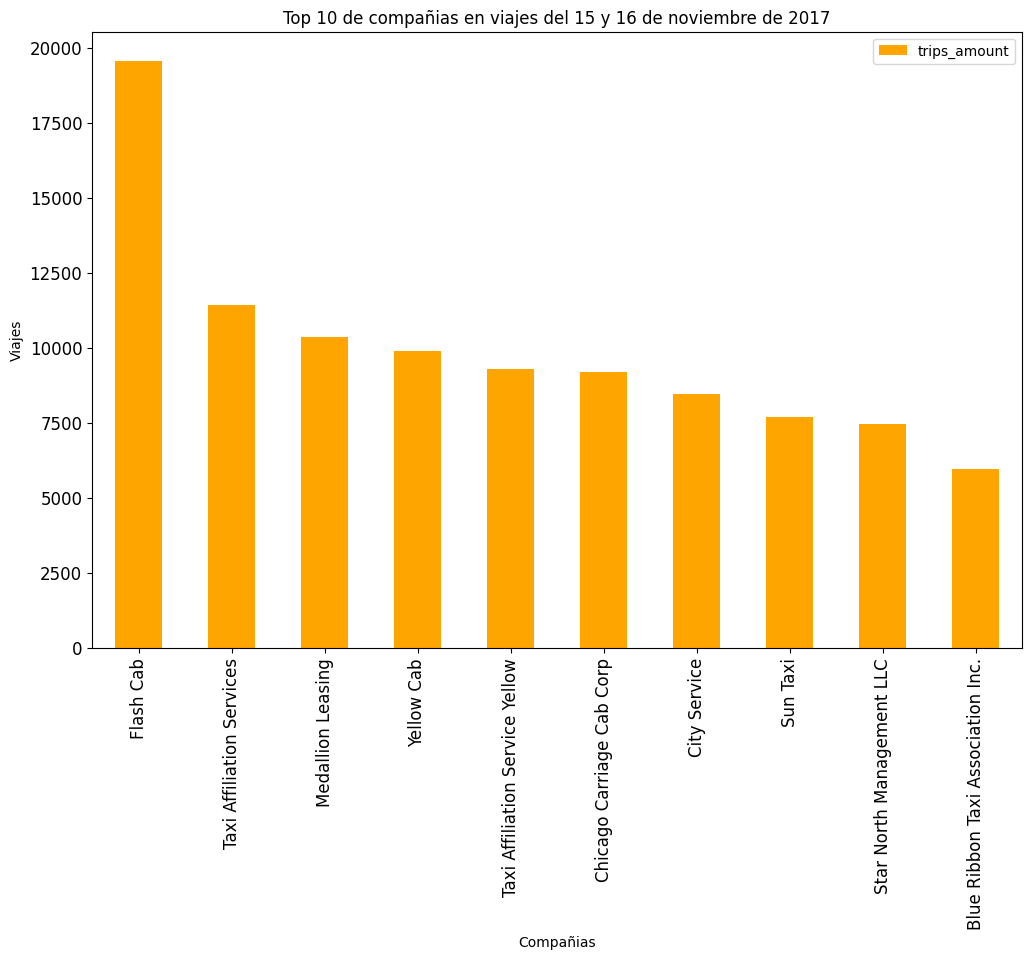

In [7]:
top10_company= df1.sort_values(by='trips_amount',ascending=False).head(10)
top10_company.plot(kind="bar",
             x = 'company_name',
             rot=90,
             fontsize=12,
             figsize=(12,8),
             color='orange')
plt.title('Top 10 de compañias en viajes del 15 y 16 de noviembre de 2017')
plt.xlabel('Compañias')
plt.ylabel('Viajes')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis, muestras de manera clara cuales son los 10 principales barrios en términos de finalización del recorrido
    </div>

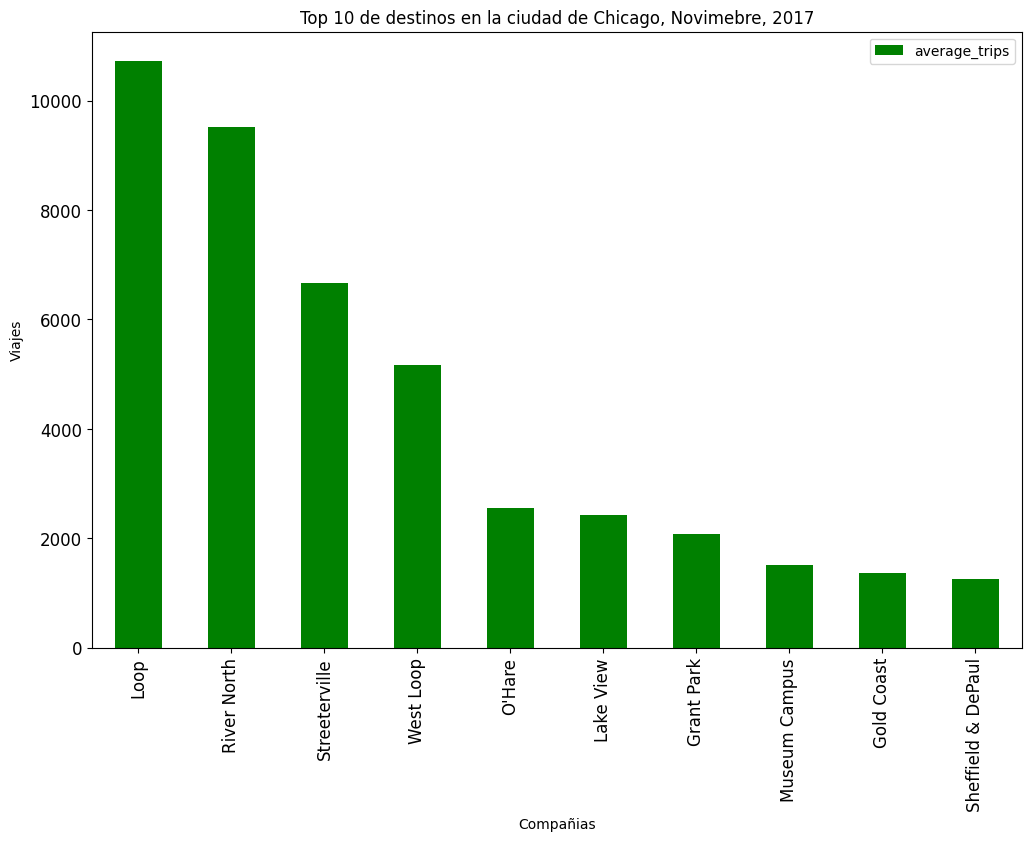

In [8]:
top10_dropoff.plot(kind="bar",
             x = 'dropoff_location_name',
             rot=90,
             fontsize=12,
             figsize=(12,8),
             color='green')
plt.title('Top 10 de destinos en la ciudad de Chicago, Novimebre, 2017')
plt.xlabel('Compañias')
plt.ylabel('Viajes')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

### Pruebas de Hipótesis 

#### La hipotesis que se probará, sera: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". Debido a lo cual se usará una prueba t-student para revisar si hay una diferencia estadísticamente relevante entre los promedios.

#### La hipótesis nula es : No existe diferencia estadística significativa entre la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O´Hare en los sábados lluviosos

#### La hipótesis alternativa es:  No existe diferencia estadística significativa entre la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O´Hare en los sábados lluviosos

#### Se establece alpha en 0.05.


In [9]:
df3['day'] = df3['start_ts'].dt.day_name()
print(df3.head())
print(df3["day"].unique())
print(df3["weather_conditions"].unique())
#en este paso revisamos que todas las fechas correspondan con dias sábado, así como que las condiciones del clima
#sean bueno o malo. 

             start_ts weather_conditions  duration_seconds       day
0 2017-11-25 16:00:00               Good            2410.0  Saturday
1 2017-11-25 14:00:00               Good            1920.0  Saturday
2 2017-11-25 12:00:00               Good            1543.0  Saturday
3 2017-11-04 10:00:00               Good            2512.0  Saturday
4 2017-11-11 07:00:00               Good            1440.0  Saturday
['Saturday']
['Good' 'Bad']


In [10]:
#Para poder usar la prueba ttest_ind se necesita: 
# Crear los grupos que se analizarán
# Realizar la prueba de levene para evaluar la igualdad de las varianzas
# Determinar el valor alpha.

good_weather = (df3.query('weather_conditions == "Good"')['duration_seconds'])
bad_weather = (df3.query('weather_conditions == "Bad"')['duration_seconds'])

alpha=0.05


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo, solamente verifica que estamos haciendo el filtro correcto para los días con buen clima y los de mal clima. Pareciera que en ambos casos filtramos por "good"
    </div>

In [11]:
# Levene 

stat, p_value_levene = stats.levene(good_weather, bad_weather)
print(f"Estadística de Levene: {stat}")
print(f"P-value de Levene: {p_value_levene}")
equal_var = p_value_levene > 0.05
print(f"¿Podemos asumir varianzas iguales?: {equal_var}")

Estadística de Levene: 0.38853489683656073
P-value de Levene: 0.5332038671974493
¿Podemos asumir varianzas iguales?: True


In [12]:
# ttest

t_stat, p_value_ttest = stats.ttest_ind(good_weather, bad_weather, equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value_ttest}")

alpha = 0.05
if p_value_ttest < alpha:
    print("Hay una diferencia significativa entre las medias de los dos grupos.")
else:
    print("No hay una diferencia significativa entre las medias de los dos grupos.")


T-statistic: -6.946177714041499
P-value: 6.517970327099473e-12
Hay una diferencia significativa entre las medias de los dos grupos.


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con la prueba de levene y la prueba de hipótesis, solamente con el ajuste que te comento an
    </div>

#### En la interpretación de la prueba de hipótesis podemos concluir que:
Parece no existir diferencias estadísticas significativas en la prueba de levene, por lo tanto asumimos la hipoteiss nula

Respecto a la prueba ttest se puede aceptar la hipótesis alternativa, encontrando que si existen diferencias estadisticas significativas en la duración de los viajes que se realizan con buen clima o mal clima los dias sábado. 